In [1]:
# THIS NOTEBOOK TESTS THE RNN LSTM ONE-TO-ONE MODEL

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import numpy as np
from data_loader import DataLoader
from utils.visualize import show_images_in_grid, show_images_as_video, show_reconstructions, compare_images_as_video, save_results, add_border
from utils.build_futures import *
from cnn import Autoencoder
from rnn_one_to_one import Seq2Seq
import random
import matplotlib.pyplot as plt

Using TensorFlow backend.
/home/abhi/anaconda3/envs/envTF113/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/abhi/anaconda3/envs/envTF113/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/abhi/anaconda3/envs/envTF113/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/abhi/anaconda3

In [4]:
root = os.getcwd()

In [5]:
rnn_data_loader = DataLoader()

In [6]:
rnn_data_loader.X_train = np.load(root+"/../datasets/train/32/X_train_normalized.npy")
rnn_data_loader.X_val = np.load(root+"/../datasets/val/32/X_val_normalized.npy")
rnn_data_loader.X_test = np.load(root+"/../datasets/test/32/X_test_normalized.npy")

In [7]:
# LET'S COMPUTE THE EMBEDDINGS FROM THE DATA AND TRAINED AUTOENCODER

In [8]:
ae = Autoencoder()
ae.build_model(input_dim=(32, 32, 3), latent_dim=(64,))
ae.set_weights(root+"/../models/autoencoder_32_v3.h5")

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
ae.autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        3136      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          65600     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          65600     
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                262208    
_________________________________________________________________
dense_2 (Dense)              (None, 192)               1248

In [10]:
X_train = ae.encode_series(rnn_data_loader.X_train)
X_val = ae.encode_series(rnn_data_loader.X_val)
X_test = ae.encode_series(rnn_data_loader.X_test)

In [11]:
X_train.shape

(160, 100, 64)

In [14]:
seq = Seq2Seq()
seq.build_model(input_dim=64, output_dim=64)
seq.set_weights(root+"/../models/seq2seq_one_to_one_32_v3.h5")

In [15]:
seq.model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, None, 64)          0         
_________________________________________________________________
lstm_2 (LSTM)                [(None, None, 1024), (Non 4460544   
_________________________________________________________________
dense_5 (Dense)              (None, None, 64)          65600     
Total params: 4,526,144
Trainable params: 4,526,144
Non-trainable params: 0
_________________________________________________________________


In [16]:
# X[i=147] and X[i=149] are both sequences starting with the same initial configuration of the environment. Looking
# at the first two timesteps alone, we can predict the future timesteps by feeding the predicted timesteps, updated
# LSTM hidden and cell states back into the model.

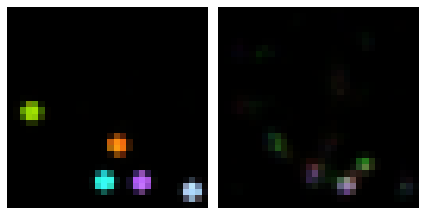

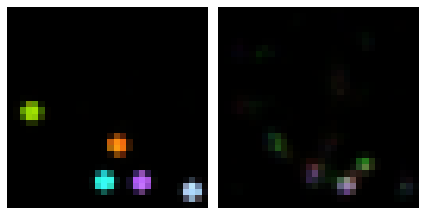

In [23]:
# i = 147
X, Y, Y_hat, i = build_future_from_past_at_a_time(seq_model=seq, ae_model=ae, X=X_test, past_horizon=2, future_horizon=80, i=147)
compare_images_as_video(Y, Y_hat)

In [24]:
y, y_hat = np.concatenate((add_border(X, color='b'), add_border(Y, color='g'))), np.concatenate((X, add_border(Y_hat, color='r')))

In [25]:
o = np.concatenate((y, y_hat), axis=2)

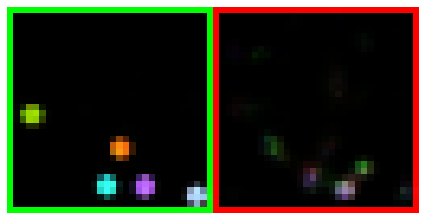

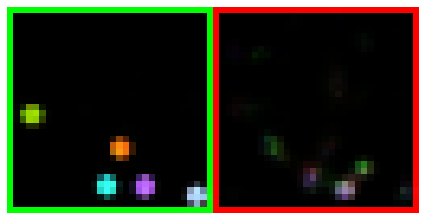

In [26]:
show_images_as_video(o)

In [27]:
save_results(X=X, Y=Y, Y_hat=o, save_dir=root+"/../results/one_to_one_recent_past_future_1", rescale=True)

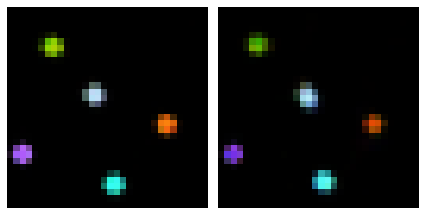

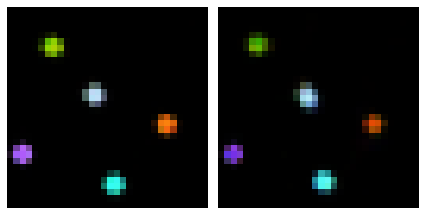

In [29]:
# i = 149
X, Y, Y_hat, i = build_future_from_past_at_a_time(seq_model=seq, ae_model=ae, X=X_test, past_horizon=2, future_horizon=90, i=149)
compare_images_as_video(Y, Y_hat)

In [30]:
y, y_hat = np.concatenate((add_border(X, color='b'), add_border(Y, color='g'))), np.concatenate((X, add_border(Y_hat, color='r')))

In [31]:
o = np.concatenate((y, y_hat), axis=2)

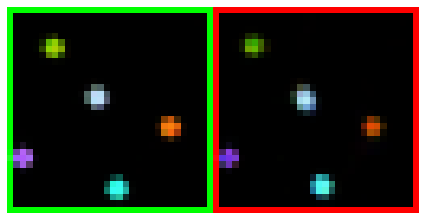

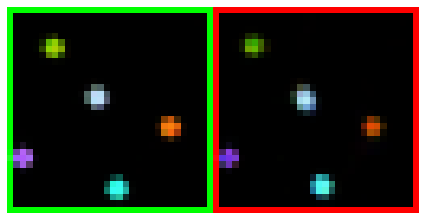

In [32]:
show_images_as_video(o)

In [33]:
save_results(X=X, Y=Y, Y_hat=o, save_dir=root+"/../results/one_to_one_recent_past_future_2", rescale=True)

In [34]:
# X[i=147] and X[i=149] are both sequences starting with the same initial configuration of the environment. Looking
# at the first fifty timesteps, we can predict the future timesteps by feeding the predicted timesteps, updated
# LSTM hidden and cell states back into the model.

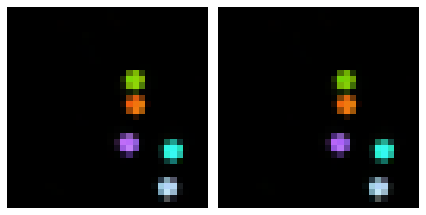

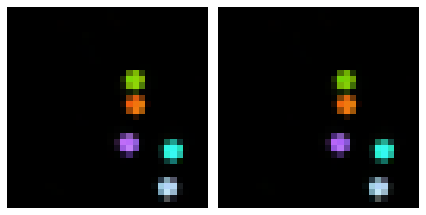

In [36]:
# i = 147
X, Y, Y_hat, i = build_future_from_past_at_a_time(seq_model=seq, ae_model=ae, X=X_test, past_horizon=50, future_horizon=50, i=147)
compare_images_as_video(Y, Y_hat)

In [37]:
y, y_hat = np.concatenate((add_border(X, color='b'), add_border(Y, color='g'))), np.concatenate((X, add_border(Y_hat, color='r')))

In [38]:
o = np.concatenate((y, y_hat), axis=2)

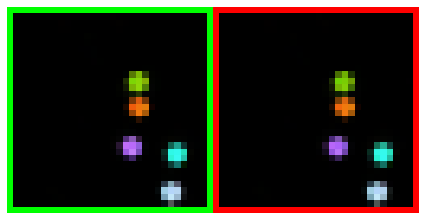

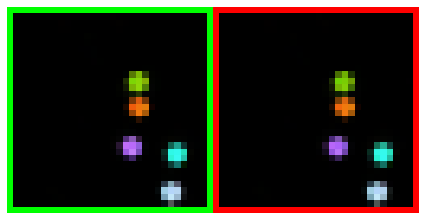

In [39]:
show_images_as_video(o)

In [40]:
save_results(X=X, Y=Y, Y_hat=o, save_dir=root+"/../results/one_to_one_past_future_1", rescale=True)

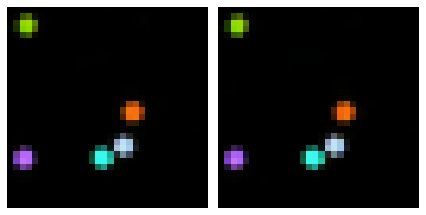

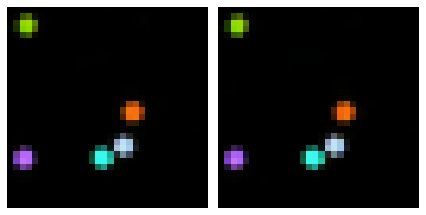

In [41]:
# i = 149
X, Y, Y_hat, i = build_future_from_past_at_a_time(seq_model=seq, ae_model=ae, X=X_test, past_horizon=50, future_horizon=50, i=149)
compare_images_as_video(Y, Y_hat)

In [42]:
y, y_hat = np.concatenate((add_border(X, color='b'), add_border(Y, color='g'))), np.concatenate((X, add_border(Y_hat, color='r')))

In [43]:
o = np.concatenate((y, y_hat), axis=2)

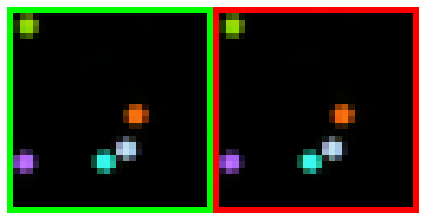

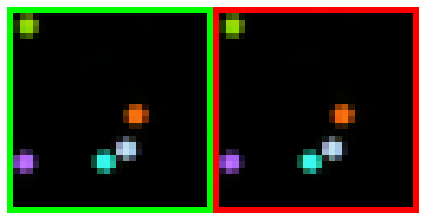

In [44]:
show_images_as_video(o)

In [45]:
save_results(X=X, Y=Y, Y_hat=o, save_dir=root+"/../results/one_to_one_past_future_2", rescale=True)